In [2]:
print(__doc__)
# Code source: Jaques Grobler
# License: BSD 3 clause


# 学习目的, 了解线性回顾。
# 目标: 修改采样范围获取不同的线性曲线
# Diabetes总共442个样本，每个10项指标, http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes
# 每个数据中都有data和target
# data是feature集合，用来预测target的
# 每个数据样本中 target是我们做标记和想要验证的值(train data), 也是我们想要预测的值(testing data)
# 本例子用第3个feature做演示
# diabetes dataset描述: http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

Automatically created module for IPython interactive environment


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]


/Users/andrewy/anaconda/envs/tensorflow/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [51]:
print(diabetes.data.size)
print(diabetes.target.size)
print(diabetes_X.size)

4420
442
442


In [50]:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [52]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [21]:
def linear_regression(number_of_testing_data):
    # index of testing data
    index_of_testing_data = -number_of_testing_data
    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:index_of_testing_data]
    diabetes_X_test  = diabetes_X[index_of_testing_data:]

    # Split the targets into training/testing sets
    diabetes_y_train = diabetes.target[:index_of_testing_data]
    diabetes_y_test  = diabetes.target[index_of_testing_data:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Make predications using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" %mean_squared_error(diabetes_y_test, diabetes_y_pred))
    #Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' %r2_score(diabetes_y_test, diabetes_y_pred))

    # Plot outputs
    plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
    plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


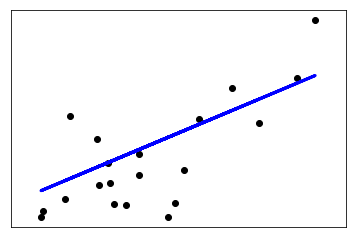

In [38]:
linear_regression(20) # 生成的图中会有20个点，可以通过点在线的上下两侧的分布来判断线下拟合的情况

Coefficients: 
 [ 953.3606272]
Mean squared error: 3752.77
Variance score: 0.38


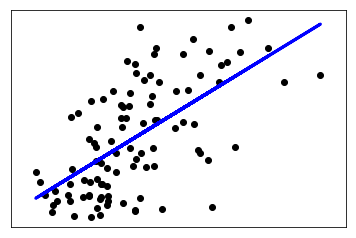

In [37]:
linear_regression(100)

Coefficients: 
 [ 925.78414794]
Mean squared error: 3830.14
Variance score: 0.36


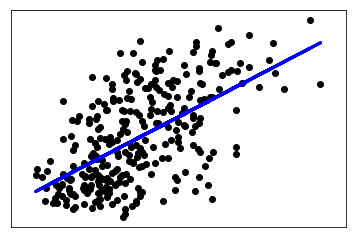

In [44]:
linear_regression(300)

In [61]:
#多元线性回归
from numpy.linalg import inv
from numpy import dot, transpose
from numpy.linalg import lstsq

X = [[1,1,1],[1,1,2],[1,2,1]]
y = [[6],[9],[8]]

print(dot(inv(dot(transpose(X),X)), dot(transpose(X),y)))
print(lstsq(X, y)[0])

[[ 1.]
 [ 2.]
 [ 3.]]
[[ 1.]
 [ 2.]
 [ 3.]]
